## Tarea: General case: technology and demographic change (TAREA: semana 27 con nota)

Part 1. Consider a production function $A_tF(K_t,L_t)=A_tK_t^\alpha L_t^{1-\alpha}$. With a productivity growth rate of g.This allows us some conveniences for the stationary model. Therefore, the capital motion law is:

$$K_{t+1}=(1-\delta)K_t + sA_tF(K_t,L_t)$$

Using $\frac{A_{t+1}-A_t}{A_t}=g$ and $\frac{L_{t+1}-L_t}{L_t}=n$ and considering $k_t=\frac{K_t}{A_tL_t}$
1. Derive a theoretical function for $k_{t+1}=g(k_{t})$ where $g(k_{t})$ also depends on $n$ and $g$
2. Derive a theoretical function for the steady state of capital such tha $k^*=h(k^*)$ whereh$k^*$ also depends on $n$ and $g$
3. Write a function in Julia to determine  $k_{t+1}=g(k_{t})$ for any grid of $k_t$ and any set of coefficients (use the ones in the lectures)
4. Write a function in Julia to determine the steady state of $k^*=h(k^*)$. 
5. Simulate in Julia  $k_{t+1}=g(k_{t})$ and TEST it converges to the value predicted by $h(k^*)$.
6. Using  $k_{t+1}=g(k_{t})$ in 3, simulate convergence over time for different values of initial capital $k_0$
7. Using  $k_{t+1}=g(k_{t})$ in 3, simulate convergence over time for different values of initial capital $k_0$ assesing the implications of different values of $n$, more specifically, $n=0, n=0.1, n=1$. Explain the intution



## Solutions (part 1 and 2)
Consider a production function $A_tF(K_t,L_t)=A_tK_t^\alpha L_t^{1-\alpha}$$. With a productivity growth rate of g.This allows us some conveniences for the stationary model. Therefore, the capital motion law is:

$$K_{t+1}=(1-\delta)K_t + sA_tF(K_t,L_t)$$

Using $\frac{A_{t+1}-A_t}{A_t}=g$ and $\frac{L_{t+1}-L_t}{L_t}=n$

More generalization


$$A_{t+1}L_{t+1}\frac{K_{t+1}}{A_{t+1}L_{t+1}}=A_tL_t\left[(1-\delta)\frac{K_t}{A_tL_t} + sF\left(\frac{K_t}{L_t} ,1\right)\right]$$


Now, lets define $k_t=\frac{K_t}{A_tL_t}$
$$(1+n)(1+g)k_{t+1}=(1-\delta)k_t + sF\left(k_t ,1\right)$$
$$(1+n)(1+g)k_{t+1}=(1-\delta)k_t + sk_t^{\alpha}$$
Hence:
$$k_{t+1}=\frac{(1-\delta)k_t + sk_t^{\alpha}}{(1+n)(1+g)} (1)$$
and in the ss:
$$k=\frac{(1-\delta)k + sk^{\alpha}}{(1+n)(1+g)}$$
$$[(1+n)(1+g)-(1-\delta)]k=sk^{\alpha}$$
$$[(1+n)(1+g)-(1-\delta)]k^{1-\alpha}=s$$
So, finally:
$$k^{1-\alpha}=\frac{s}{(1+n)(1+g)-(1-\delta)}$$
and
$$k=\left(\frac{s}{(1+n)(1+g)-(1-\delta)}\right)^{\frac{1}{1-\alpha}} (2)$$



Notice that if $n=0$ 
$$k_{t+1}=\frac{(1-\delta)k_t + sk_t^{\alpha}}{(1+g)} (1*)$$
$$k=\left(\frac{s}{g+\delta}\right)^{\frac{1}{1-\alpha}} (2*)$$

further if $n=g=0$
$$k_{t+1}=(1-\delta)k_t + sk_t^{\alpha} (1**)$$
$$k=\left(\frac{s}{\delta}\right)^{\frac{1}{1-\alpha}} (2**)$$


## Solutions (part 3 and 4)
Create two functions for:

3. Policy function

$$k_{t+1}=\frac{(1-\delta)k_t + sk_t^{\alpha}}{(1+n)(1+g)} (1)$$

4. Steady state
$$k=\left(\frac{s}{(1+n)(1+g)-(1-\delta)}\right)^{\frac{1}{1-\alpha}} (2)$$


In [1]:
using Plots, Parameters

function params(; A=2.0, s=0.3, α=0.3, δ=0.4, x0=0.25, kmin=0.0, kmax=3.0, N=10_000,
                  g=0.01, n=0.03 ) #Notice that we incorporate the population growth rate
    kgrid = range(kmin, kmax, length=N)
    t = range(1,100, N)
    return (A=A, s=s, α=α, δ=δ, x0=x0, kmin=kmin, kmax=kmax, kgrid=kgrid, t=t, g=g,n=n)
end


function g(p, k)
    @unpack A, s, α, δ,g = p
    return ((1 - δ)*k+ s * k.^α )/((1+g)*(1+n))
end

function kstar(p)
    @unpack s, A, δ, α,g = p
    return (s/ ((1+n)*(1+g)-(1-δ)))^(1/(1 - α))
end

kstar (generic function with 1 method)

## Solutions (part 5)
Redifine the policy function and the ss, taking into account, explicitly $n$

In [2]:
function g_plot(g,n,p, k)
    @unpack s, α, δ= p
    return ((1 - δ)*k+ s * k.^α )/((1+g)*(1+n))
end
function kstar_plot(g,n,p)
    @unpack s, A, δ, α= p
    return (s/ ((1+n)*(1+g)-(1-δ)))^(1/(1 - α))
end

kstar_plot (generic function with 1 method)

### Sanity check

In [3]:
p = params()
growth_a=0.1
growth_n=0.03
kstar_plot(growth_a,growth_n,p)

0.43996696160224974

In [4]:
g_plot(growth_a,growth_n,p,kstar_plot(growth_a,growth_n,p))

0.4399669616022498

Now tests convergence over time for a given $k_0$. First, generate a function:

In [5]:
function simulate_k(g,n,k0, k_length)
    k=zeros(k_length,1)
    k0=k0
    k[1]=k0
    for t= 2:k_length
        k[t] = g_plot(g,n,p,k[t-1])
    end
    return k
end

simulate_k (generic function with 1 method)

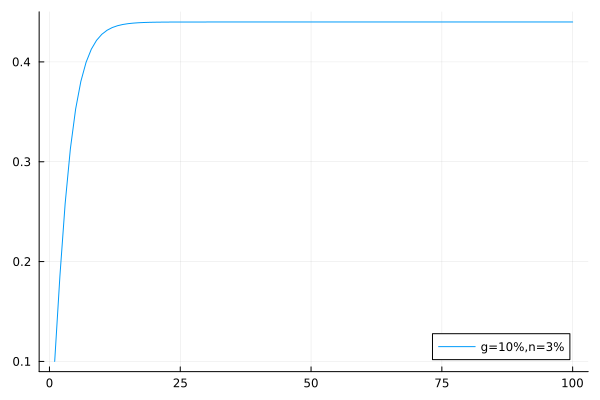

In [6]:
p = params()
growth_a=0.1
growth_n=0.03
k0=0.1
k_length=100
k_sim=simulate_k(growth_a,growth_n,k0, k_length);
plot(k_sim,label="g=10%,n=3%")

## Solutions (part 6)
Plot for a set of alternative innitial values of  𝑘0

In [7]:
function k_plot(g,n,p,k0_vec,t)
    kss=kstar_plot(g,n,p)*ones(t,1)
    g_00_vec=Dict()
    pl=plot(kss,label="k*")
    for (i,k0) in enumerate(k0_vec)
        g_00_vec[i]=simulate_k(g,n,k0, t)
        pl=plot!(g_00_vec[i],label="k=$k0")
    end
    display(pl)
end

k_plot (generic function with 1 method)

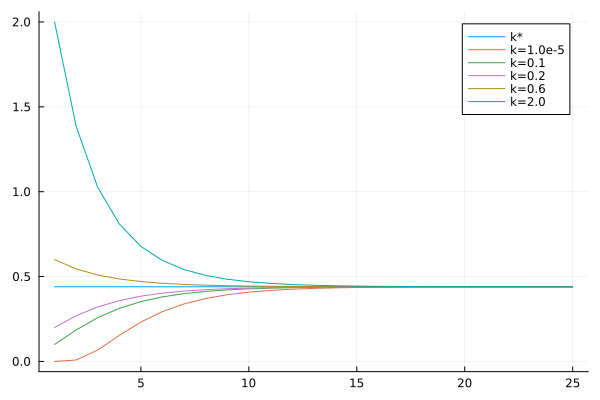

In [8]:
p = params()
growth_a=0.1
growth_n=0.03
t=25
k0_vec=[0.00001,0.1,0.2,0.6,2]
k_plot(growth_a,growth_n,p,k0_vec,25)

## Solutions (part 7)

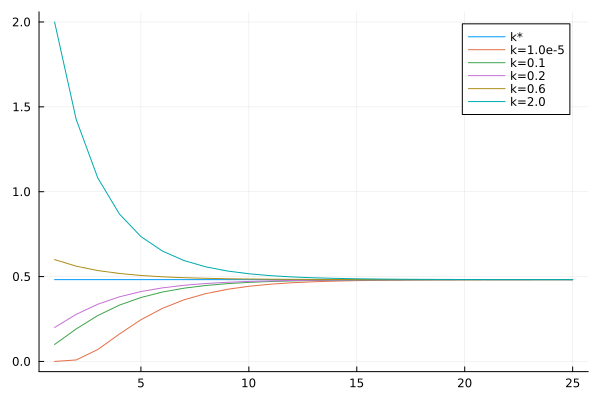

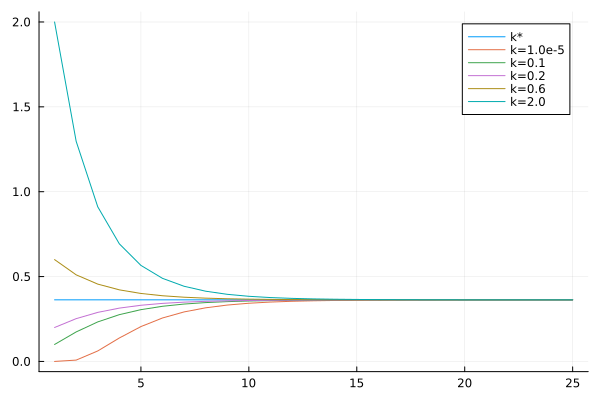

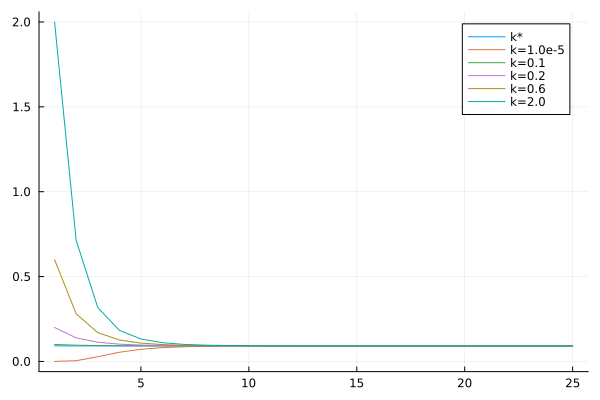

In [9]:
p = params()
growth_a=0.1
growth_n0=0.0
growth_n1=0.1
growth_n2=1
t=25
k0_vec=[0.00001,0.1,0.2,0.6,2]
k_plot(growth_a,growth_n0,p,k0_vec,25)
k_plot(growth_a,growth_n1,p,k0_vec,25)
k_plot(growth_a,growth_n2,p,k0_vec,25)

## Explanaition: as the rate of population growth increases, less capital per capita in the steady state. The convergence is also faster. The reason is that, as population growth increases we have less capital per capita in steady state and we converge to this level faster. 